# Description

In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 48842 rows and 15 features.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Loading libraries and dataset

In [1]:
pip install xgboost

You should consider upgrading via the 'C:\Users\rutvi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#Importing Dataset
adult = pd.read_csv("adult.csv")

## 1. Descriptive Analysis

In [4]:
#Preview of Dataset
adult.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#shape of the dataset
adult.shape

(48842, 15)

In [6]:
#features datatype
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#statostocal summary
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Checking for null values
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
#Checking for unique values of dataframe
adult.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
#Checking for unique values of a feature -age
adult['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [11]:
#Checking the counts of workclass
adult['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
#Checking the counts of education
adult['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [13]:
#Checking the counts of educational-num
adult['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [14]:
#Checking the counts of marital-status
adult['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [15]:
#Checking the counts of occupation
adult['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
#Checking the counts of relationship
adult['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [17]:
#Checking the counts of race
adult['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [18]:
#Checking the counts of gender
adult['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [19]:
# Checking the counts of label categories
income = adult['income'].value_counts(normalize=True)
income

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [20]:
#Checking the unique values of gender
adult['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [21]:
#Checking the unique values of native country
adult['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [22]:
#adult['capital-gain'].unique()
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Observations:
The dataset doesn't have any null values, but it contains missing values in the form of '?' in feature (workclass, occupation, native-county) which needs to be preprocessed.

The dataset is unbalanced, as the dependent feature 'income' contains 76.07% values have income less than 50k and 23.92% values have income more than 50k.

# 2. Exploratory Data Analysis

## 2.1 Univarient Analysis

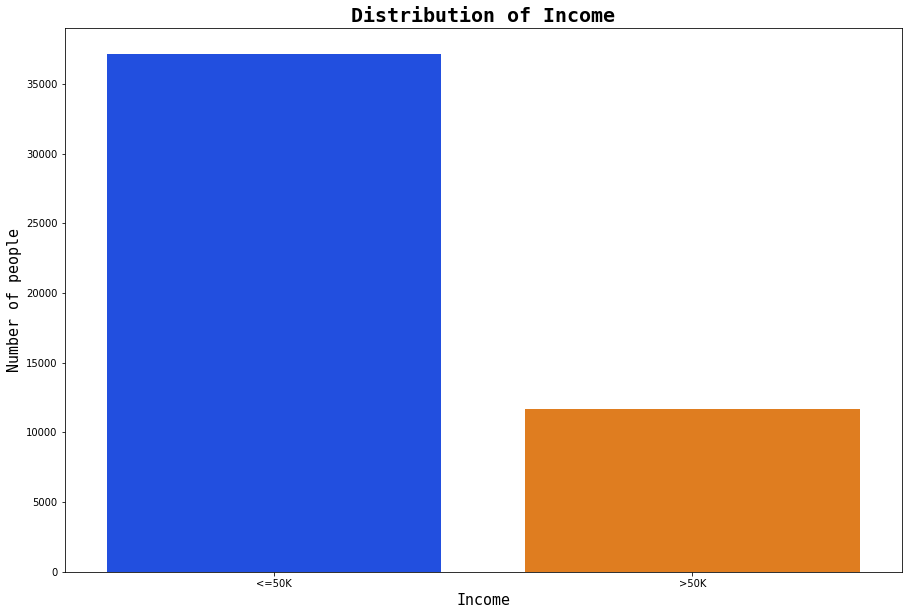

In [23]:
# Creating a barplot for 'Income'

rc = plt.figure(figsize=(15, 10))

sns.countplot(adult['income'], palette='bright', data=adult)

plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

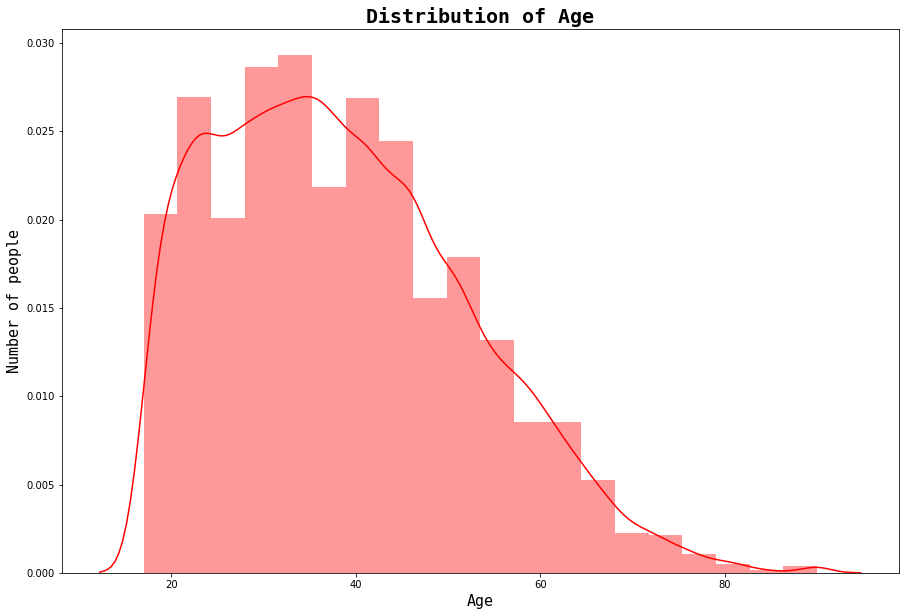

In [24]:
# Creating a distribution plot for 'Age'

plt.figure(figsize=(15, 10))

#sns.countplot(adult['age'], palette='bright', data=adult)
sns.distplot(adult['age'], bins=20, color='r', kde=True)

plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

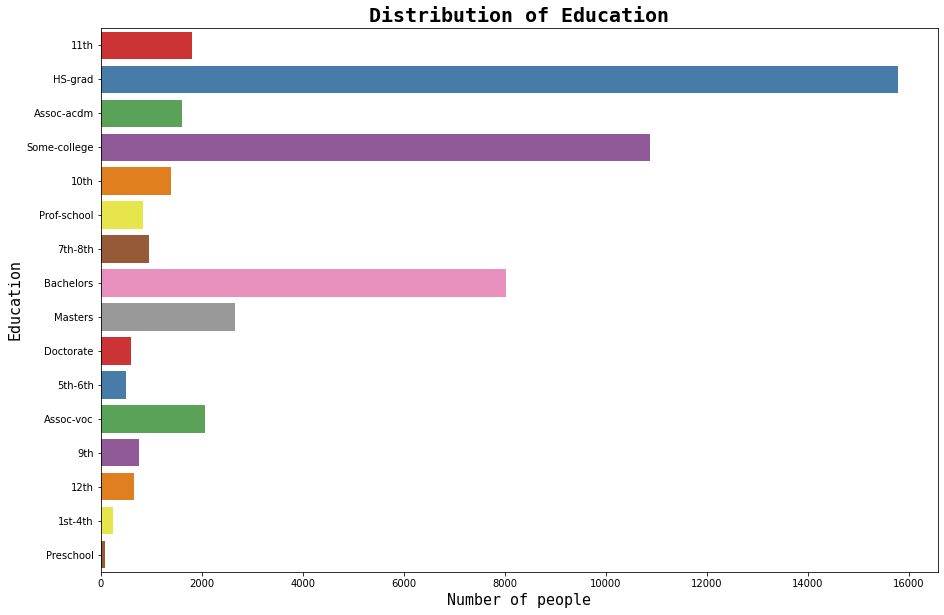

In [25]:
# Creating a bar plot for 'Education'

plt.figure(figsize=(15, 10))

sns.countplot(y=adult['education'], orient="horizontal", palette='Set1', data=adult)

plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

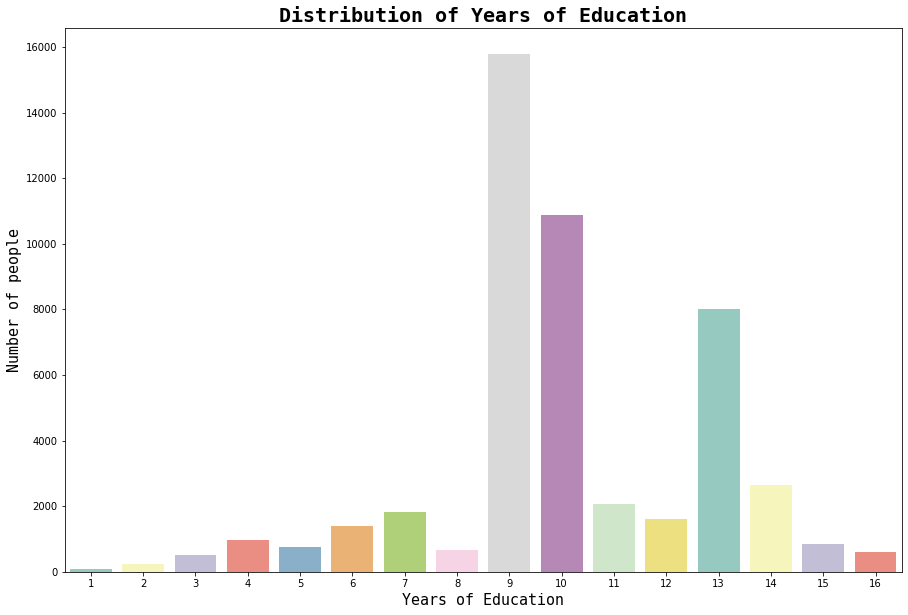

In [26]:
# Creating a bar plot for 'years of education'

plt.figure(figsize=(15, 10))

sns.countplot(adult['educational-num'], palette='Set3', data=adult)

plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

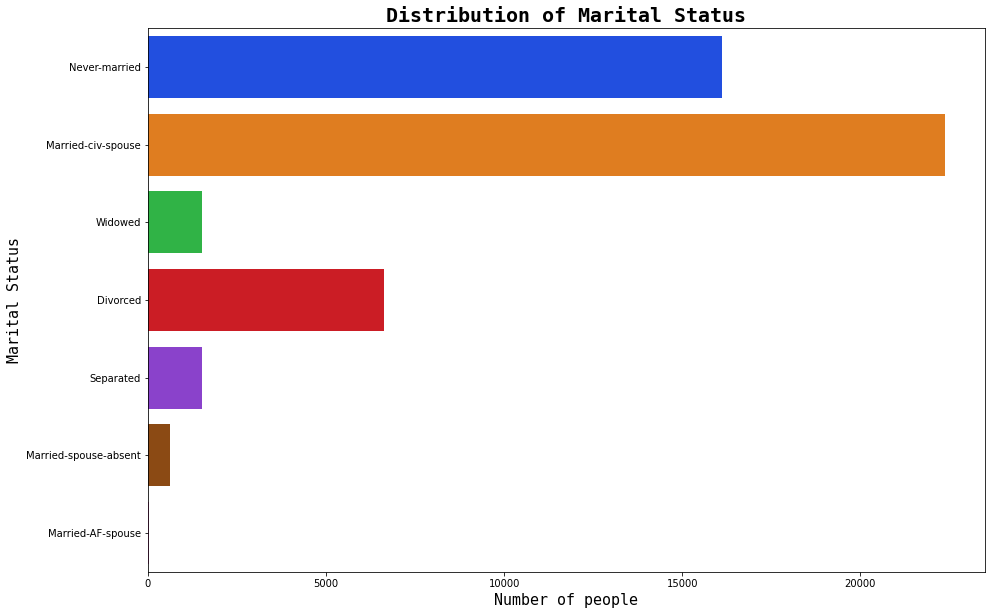

In [27]:
# Creating a bar plot for 'marital status'

plt.figure(figsize=(15, 10))

sns.countplot(y=adult['marital-status'], orient='h', palette='bright', data=adult)

plt.title('Distribution of Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

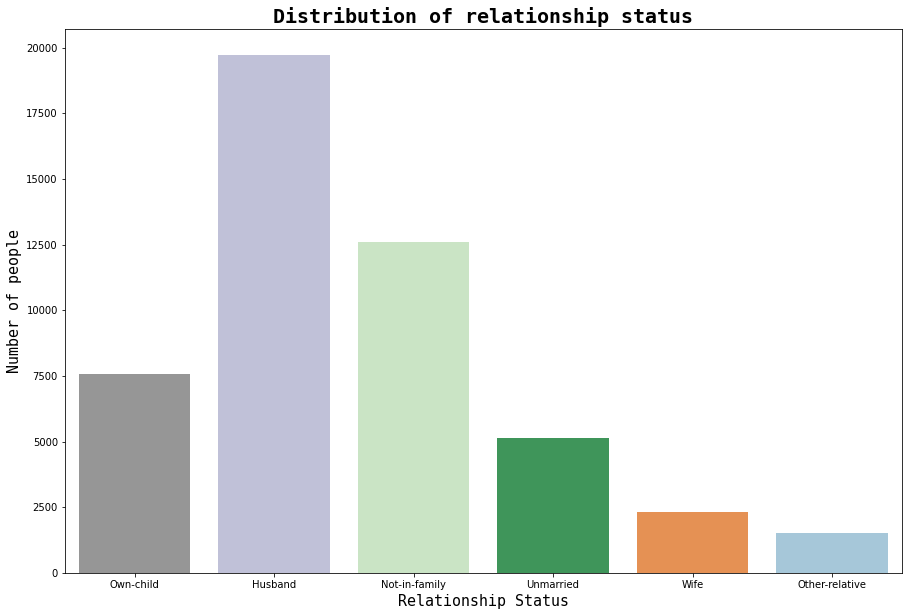

In [28]:
# Creating a bar plot for 'Relationship status'

plt.figure(figsize=(15, 10))

sns.countplot(adult['relationship'], palette='tab20c_r', data=adult)

plt.title('Distribution of relationship status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Relationship Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

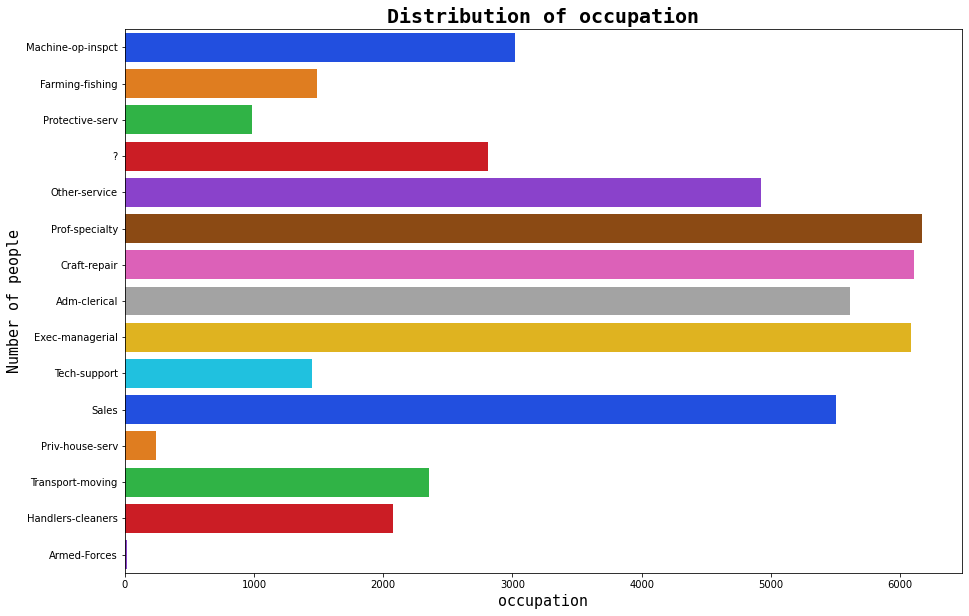

In [29]:
# Creating a bar plot for 'Occupation'

plt.figure(figsize=(15, 10))

sns.countplot(y=adult['occupation'], orient='h', palette='bright', data=adult)

plt.title('Distribution of occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('occupation', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

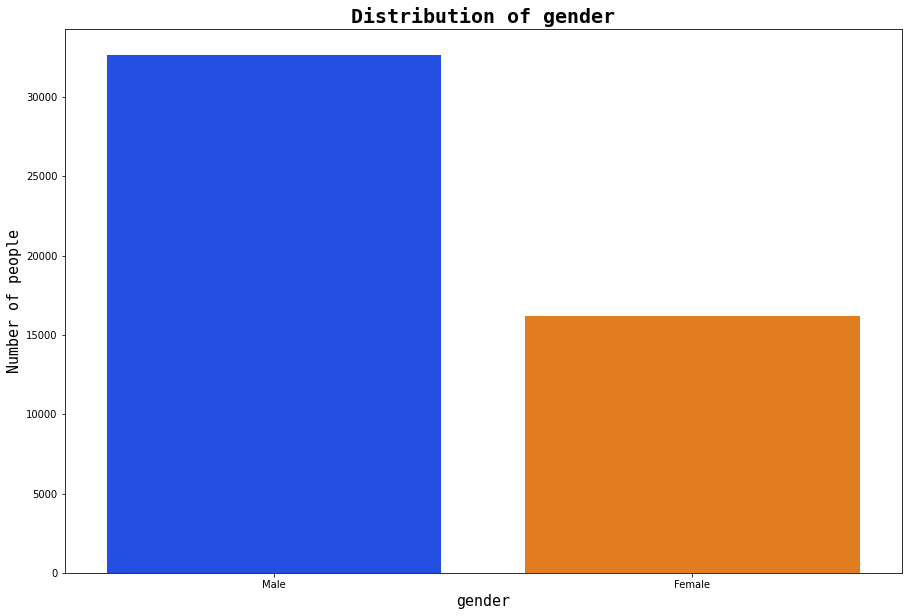

In [30]:
# Creating a bar plot for 'gender'

plt.figure(figsize=(15, 10))

sns.countplot(adult['gender'], palette='bright', data=adult)

plt.title('Distribution of gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

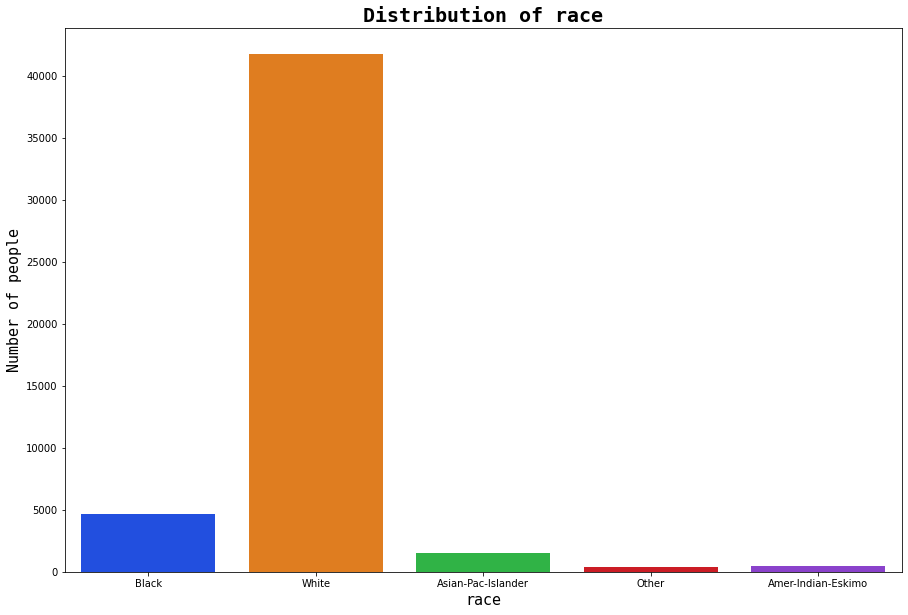

In [31]:
# Creating a bar plot for 'race'

plt.figure(figsize=(15, 10))

sns.countplot(adult['race'], palette='bright', data=adult)
plt.title('Distribution of race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

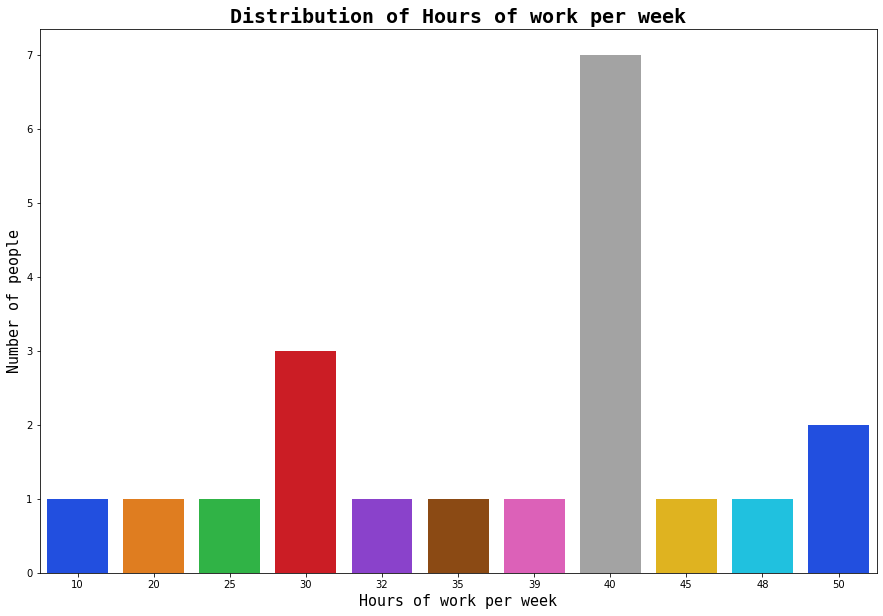

In [32]:
# Creating a bar plot for 'hours-per-week'

plt.figure(figsize=(15, 10))

sns.countplot(adult['hours-per-week'].head(20), palette='bright', data=adult)
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work per week', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.show()

## 2.2 Bivariate Analysis

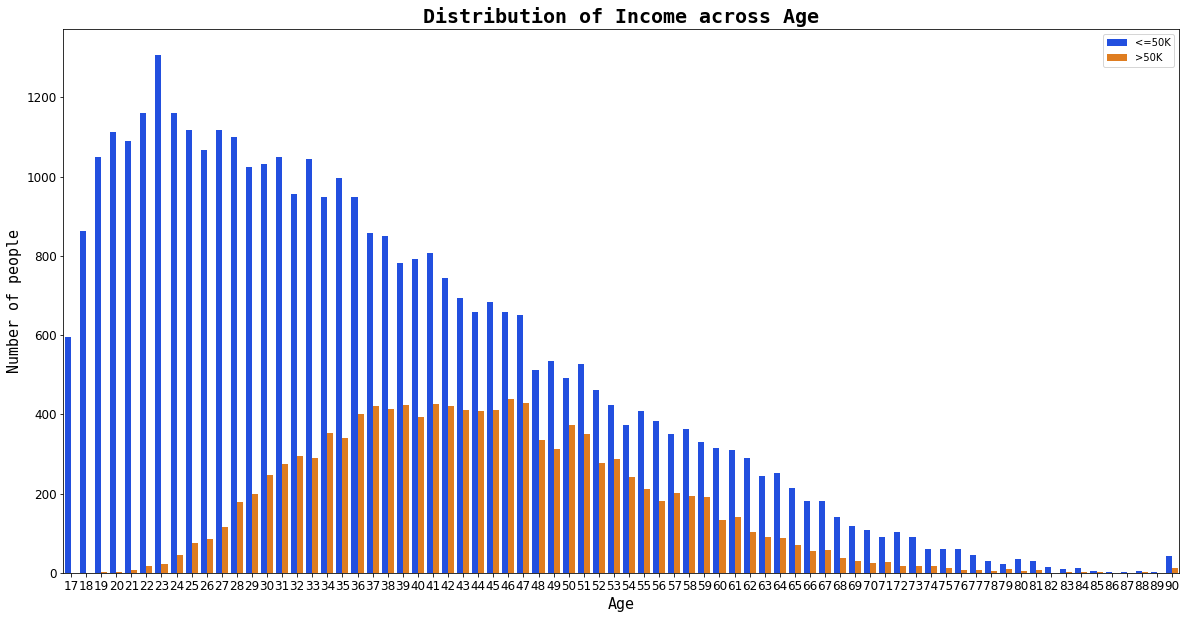

In [33]:
# Creating a countplot of income across age

plt.figure(figsize=(20, 10))
sns.countplot(adult['age'], hue=adult['income'], palette='bright')
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1)
plt.show()

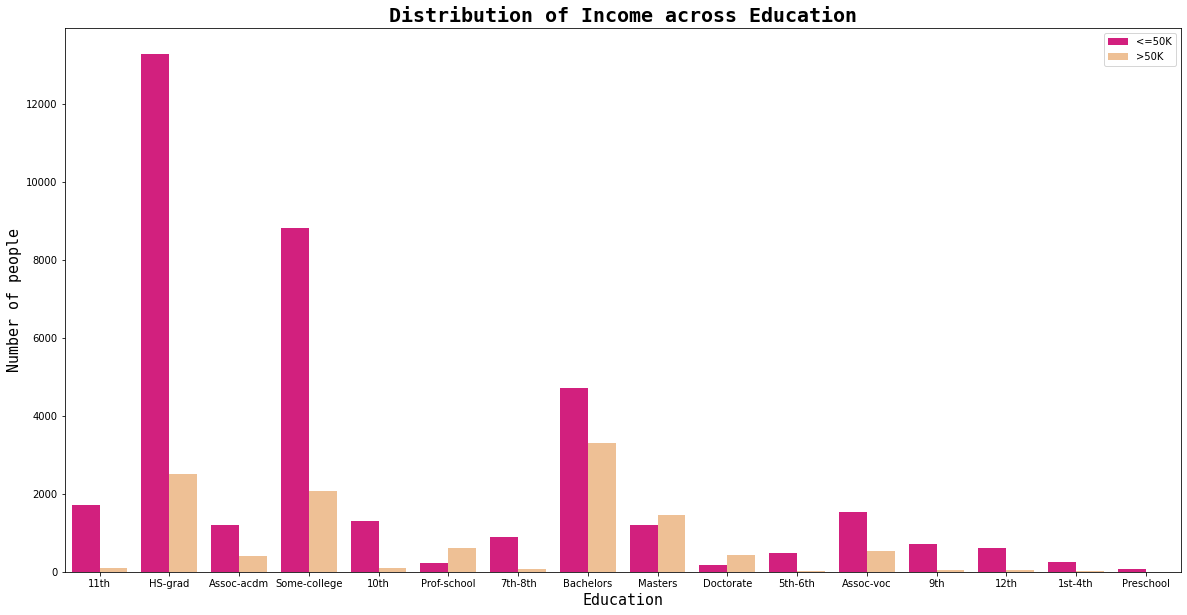

In [34]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 10))
sns.countplot(adult['education'],
              hue=adult['income'], palette='Accent_r')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

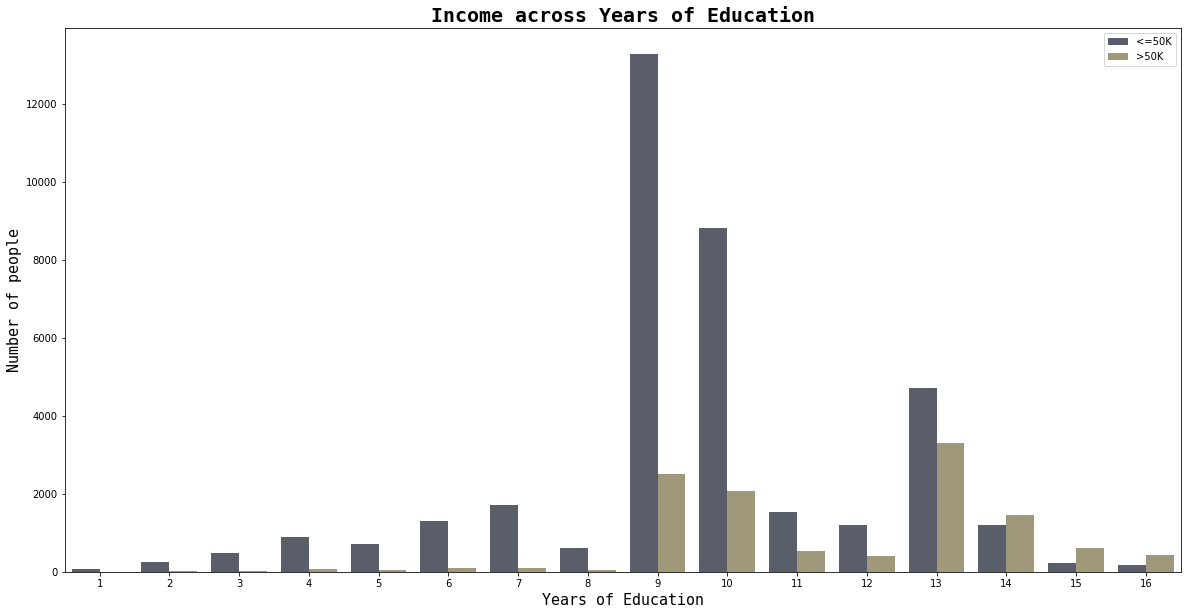

In [35]:
# Creating a countplot of income across years of education

plt.figure(figsize=(20, 10))

sns.countplot(adult['educational-num'],
              hue=adult['income'], palette='cividis')
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

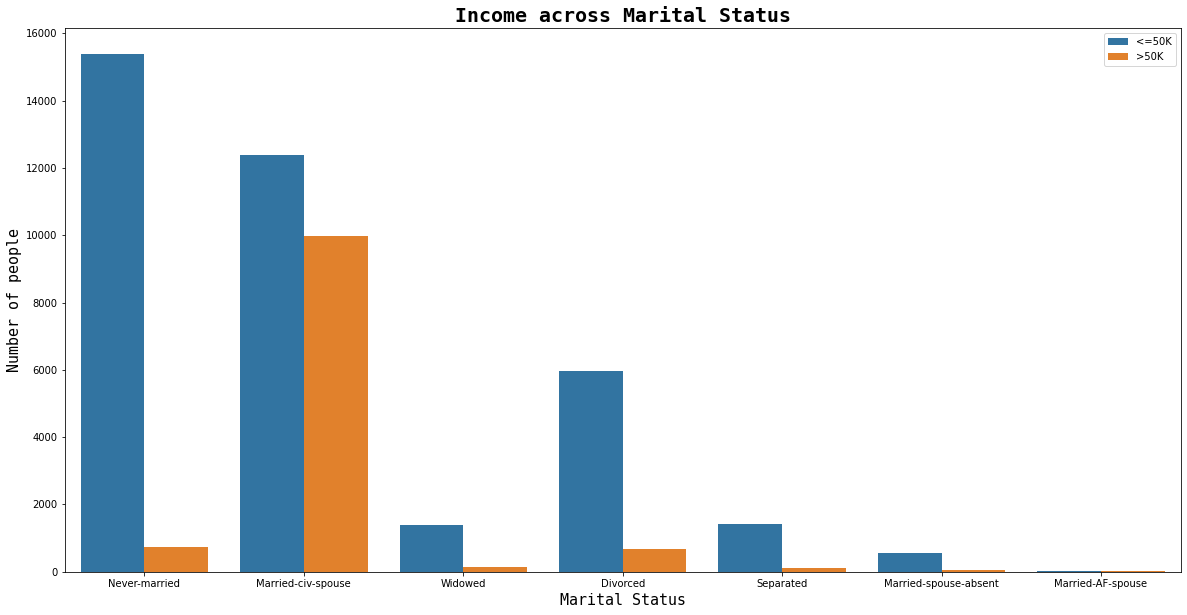

In [36]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 10))

sns.countplot(adult['marital-status'], hue=adult['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

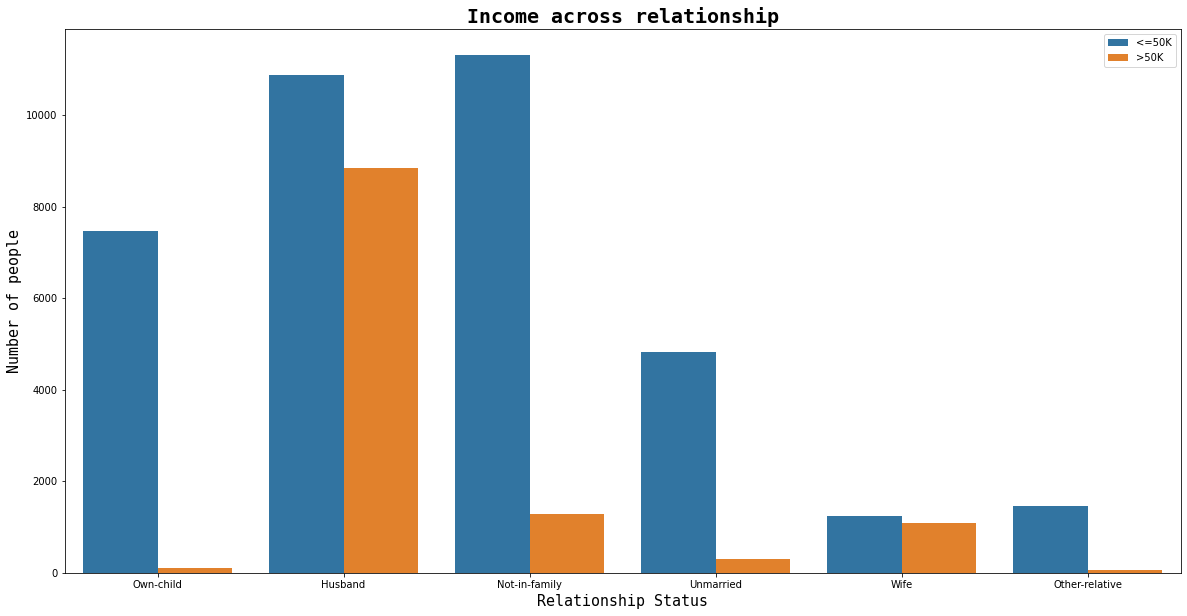

In [37]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 10))

sns.countplot(adult['relationship'], hue=adult['income'])
plt.title('Income across relationship', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Relationship Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

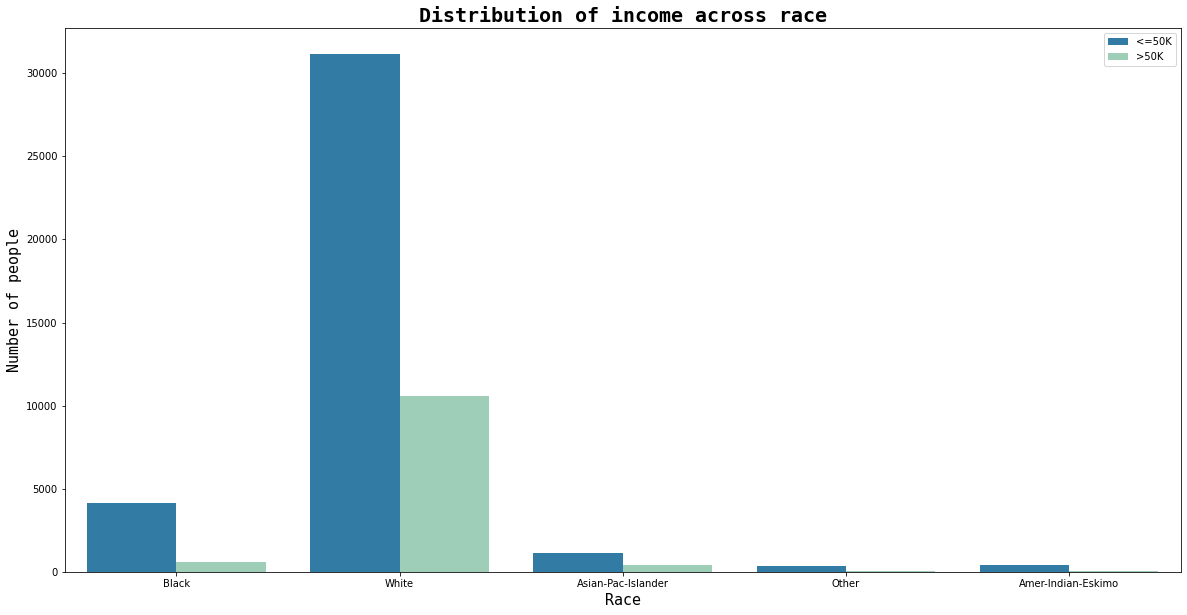

In [38]:
# Creating a countplot of income across race

plt.figure(figsize=(20, 10))

sns.countplot(adult['race'], hue=adult['income'], palette='YlGnBu_r')
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

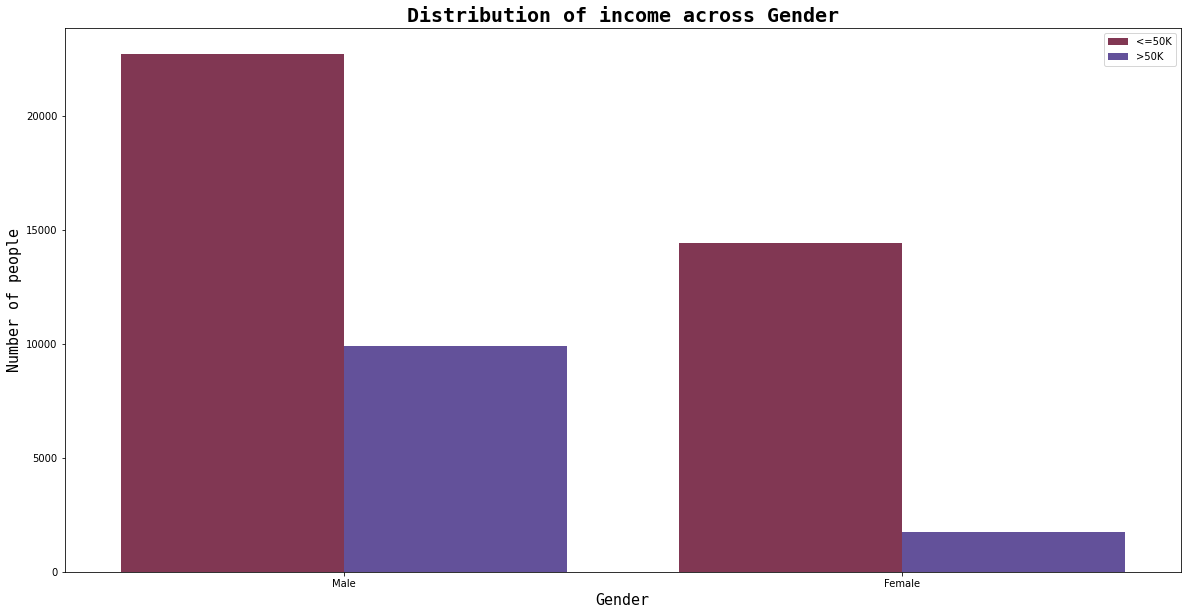

In [39]:
# Creating a countplot of income acros gender

plt.figure(figsize=(20,10))
sns.countplot(adult['gender'], hue=adult['income'], palette='twilight_r')
plt.title('Distribution of income across Gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

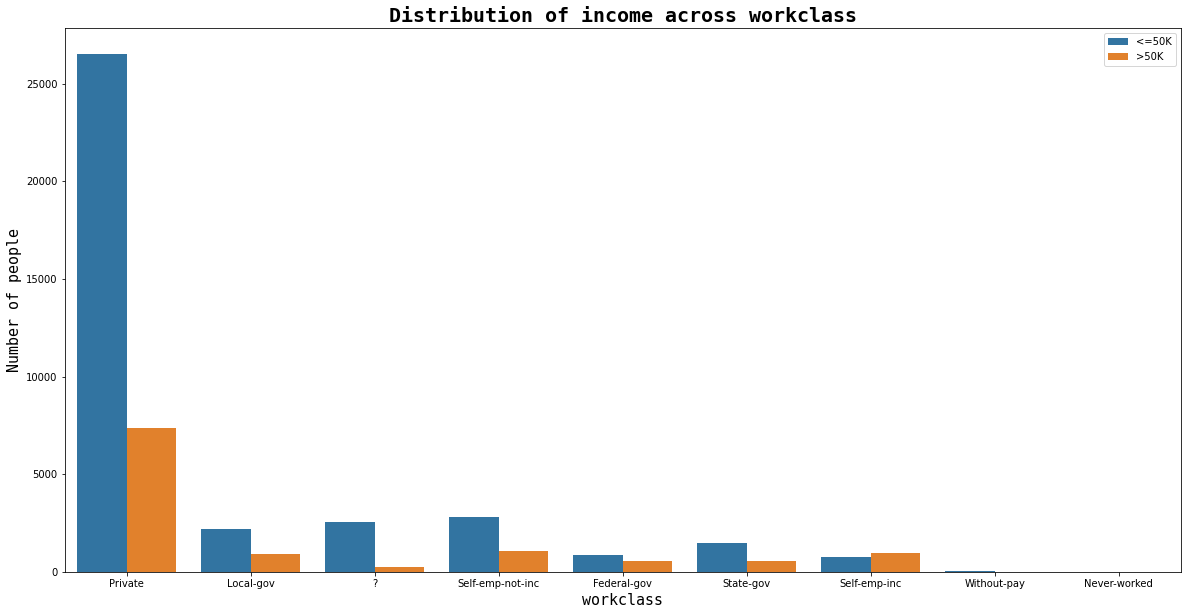

In [40]:
# Creating a countplot of income acros gender

plt.figure(figsize=(20,10))
sns.countplot(adult['workclass'], hue=adult['income'])
plt.title('Distribution of income across workclass', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('workclass', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.legend(loc=1)
plt.show()

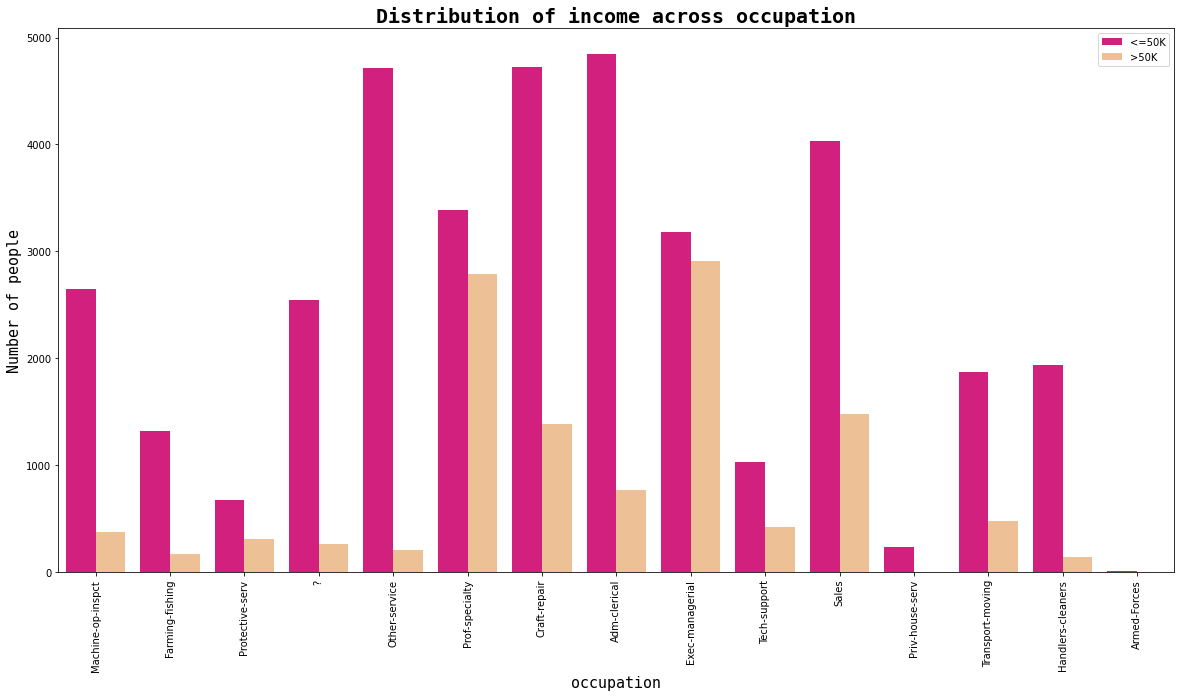

In [41]:
# Creating a countplot of income acros gender

plt.figure(figsize=(20,10))
sns.countplot(adult['occupation'], hue=adult['income'], palette='Accent_r')
plt.title('Distribution of income across occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('occupation', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

## 2.3 Multivarient Analysis

In [42]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

In [43]:
adult['income'] = label_en.fit_transform(adult['income'])

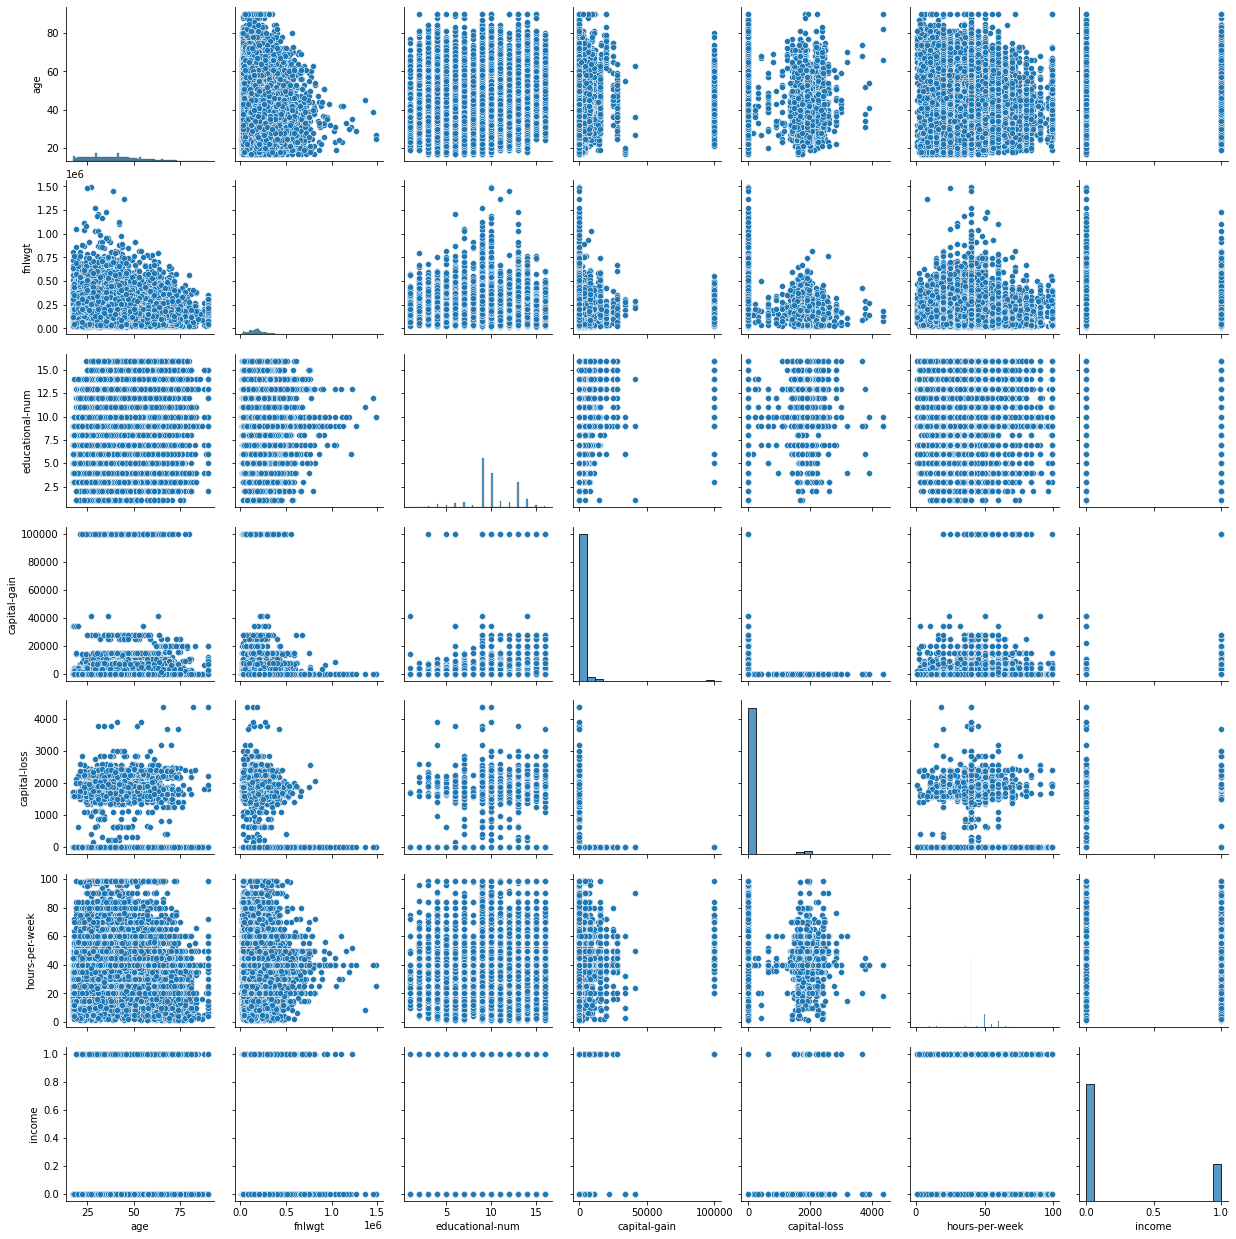

In [44]:
# Creating a pairplot of dataset
sns.pairplot(adult)
plt.show()

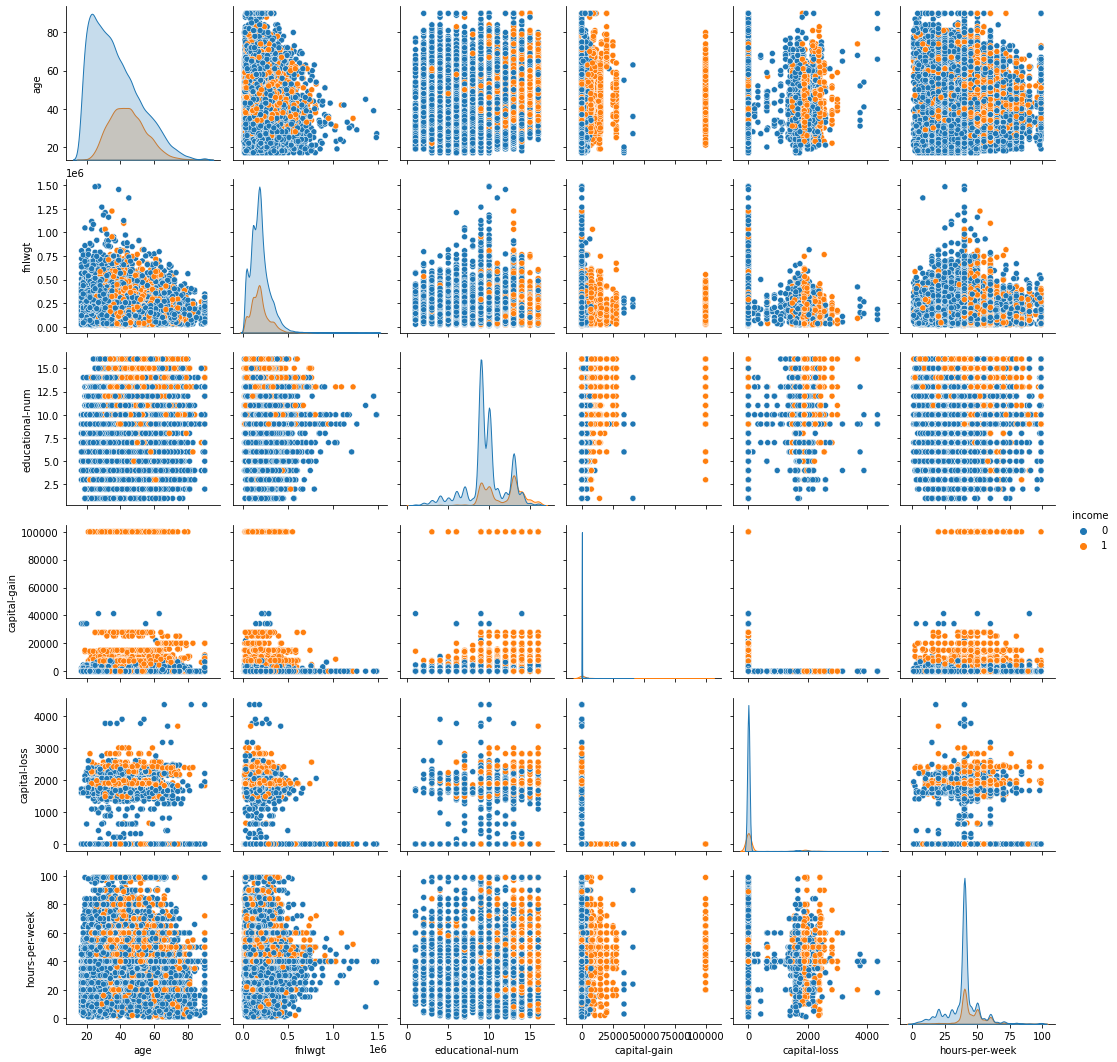

In [45]:
# Creating a pairplot of dataset
sns.pairplot(adult, hue='income')
plt.show()

In [46]:
adult.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


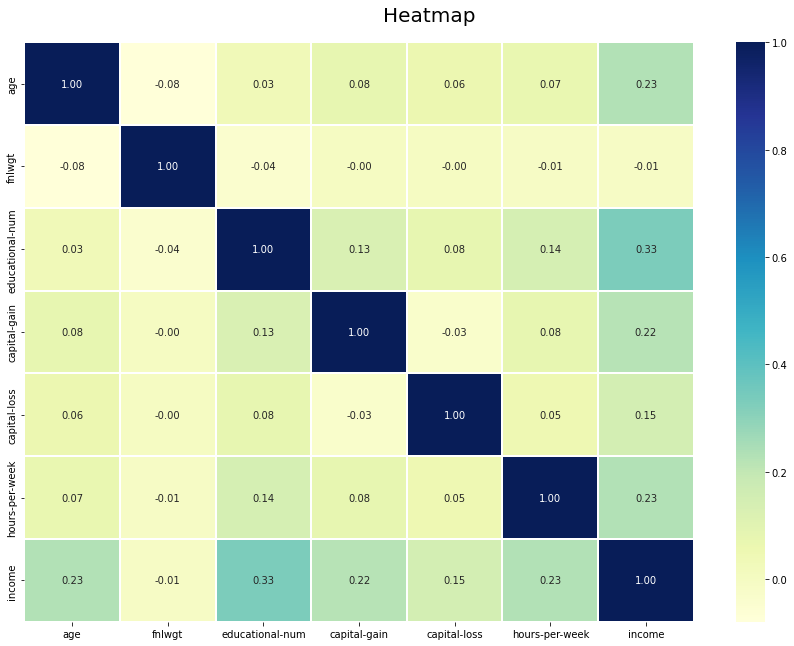

In [47]:
corr_data = adult.corr()
f, ax = plt.subplots(figsize=(15,10))
hmap = sns.heatmap(round(corr_data, 2), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.05)
f.subplots_adjust (top=0.93)
t = f.suptitle('Heatmap', fontsize=20)

### Observations:
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

# 3. Data Preprocessing

## 3.1 Fixing  '?'  values in the dataset

In [48]:
adult['workclass'] = adult['workclass'].replace('?', adult['workclass'].mode()[0])
adult['occupation'] = adult['occupation'].replace('?', adult['occupation'].mode()[0])
adult['native-country'] = adult['native-country'].replace('?', adult['native-country'].mode()[0])

In [49]:
adult['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [50]:
adult['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [51]:
adult['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

## 3.2 Feature Selecting

In [80]:
X = adult.drop(['income', 'capital-loss', 'fnlwgt'], axis=1)
y = adult['income']

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  native-country   48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


## 3.3 Fixing imbalance dataset using oversampling

In [82]:
pip install imbalanced-learn

You should consider upgrading via the 'C:\Users\rutvi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [83]:
round(y.value_counts(normalize=True) * 100, 2)

0    76.07
1    23.93
Name: income, dtype: float64

In [84]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [85]:
round(y_resampled.value_counts(normalize=True) * 100, 2)

0    50.0
1    50.0
Name: income, dtype: float64

## 3.4 Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

In [87]:
X_train.shape

(52017, 12)

In [88]:
X_test.shape

(22293, 12)

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22293 entries, 35883 to 25670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              22293 non-null  int64 
 1   workclass        22293 non-null  object
 2   education        22293 non-null  object
 3   educational-num  22293 non-null  int64 
 4   marital-status   22293 non-null  object
 5   occupation       22293 non-null  object
 6   relationship     22293 non-null  object
 7   race             22293 non-null  object
 8   gender           22293 non-null  object
 9   capital-gain     22293 non-null  int64 
 10  hours-per-week   22293 non-null  int64 
 11  native-country   22293 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.2+ MB


# 4. Data Modeling with Pipeline (OneHotEncoder, Scaler and Model)

## 4.1 Logistic Regression

In [90]:
logr_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

logr_model = LogisticRegression(random_state=42)

pipeline = make_pipeline(logr_transformer, scaler, logr_model)

pipeline.fit(X_train, y_train)

y_pred_logr = pipeline.predict(X_test)

## 4.2 KNN Classifier

In [91]:
knn_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

knn_model = KNeighborsClassifier()

pipeline = make_pipeline(knn_transformer, scaler, knn_model)

pipeline.fit(X_train, y_train)

y_pred_knn = pipeline.predict(X_test)

## 4.3 Support Vector Classifier

In [92]:
svc_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

svc_model = SVC(random_state=42)

pipeline = make_pipeline(svc_transformer, scaler, svc_model)

pipeline.fit(X_train, y_train)

y_pred_svc = pipeline.predict(X_test)

## 4.4 Decision Tree Classifier

In [93]:
DecT_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

DecT_model = DecisionTreeClassifier(random_state=42)

pipeline = make_pipeline(DecT_transformer, scaler, DecT_model)

pipeline.fit(X_train, y_train)

y_pred_DecT = pipeline.predict(X_test)

## 4.5 Random Forest Classifier

In [94]:
RandF_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

RandF_model = RandomForestClassifier()

pipeline = make_pipeline(RandF_transformer, scaler, RandF_model)

pipeline.fit(X_train, y_train)

y_pred_RandF = pipeline.predict(X_test)

## 4.6 XGB Classifier

In [95]:
XGB_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

XGB_model = XGBClassifier()

pipeline = make_pipeline(XGB_transformer, scaler, XGB_model)

pipeline.fit(X_train, y_train)

y_pred_XGB = pipeline.predict(X_test)

# 5. Model Evaluation 

In [96]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_logr) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_logr) * 100, 2))

Logistic Regression:
Accuracy score: 82.18
F1 score: 82.59


In [97]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 82.69
F1 score: 83.47


In [98]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.97
F1 score: 82.77


In [99]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_DecT) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_DecT) * 100, 2))

Decision Tree Classifier:
Accuracy score: 88.98
F1 score: 89.43


In [100]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_RandF) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_RandF) * 100, 2))

Random Forest Classifier:
Accuracy score: 90.5
F1 score: 90.9


In [101]:
print('XG Boost Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_XGB) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_XGB) * 100, 2))

XG Boost Classifier:
Accuracy score: 85.55
F1 score: 85.99


# 6. Hyperparameter Tuning

In [142]:
RandF_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

RandF_model_tune = RandomForestClassifier(n_estimators=1000,  max_depth=42, max_samples=0.8, random_state=42)

pipeline = make_pipeline(RandF_transformer, scaler, RandF_model_tune)

pipeline.fit(X_train, y_train)

y_pred_RandF_tune = pipeline.predict(X_test)

In [143]:
print('Random Forest Classifier with Hyperparameter Tunning:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_RandF_tune) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_RandF_tune) * 100, 2))

Random Forest Classifier with Hyperparameter Tunning:
Accuracy score: 90.33
F1 score: 90.8


# 7. Report

In [144]:
conf_mat = confusion_matrix(y_test, y_pred_RandF)

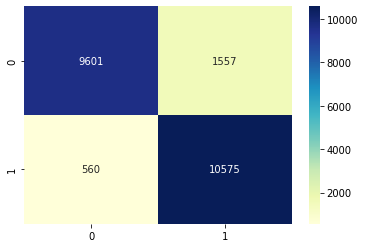

In [145]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RandF))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11158
           1       0.87      0.95      0.91     11135

    accuracy                           0.91     22293
   macro avg       0.91      0.91      0.90     22293
weighted avg       0.91      0.91      0.90     22293



# Conclusion:
In this project, I build various models like logistic regression, KNN classifier, support vector classifier, decision tree classifier, random forest classifier and XGBoost classifier.

A Random Forest Classifier (without hyper parameter tunned) gives the highest accuracy score of 90.50% and f1 score of 90.90%.